In [1]:

# from formulas import *
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import math
import tensorflow as tf
import yfinance as yf
keras = tf.keras
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as tsa


2023-10-07 00:02:05.166592: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-07 00:02:05.350859: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-07 00:02:06.438655: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-07 00:02:06.446364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-07 00:02:10.374347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df = yf.download('AAPL',start='2000-01-01',end='2023-09-01')
df
series=df['Close']

[*********************100%%**********************]  1 of 1 completed


In [3]:
df['Close']

Date
2000-01-03      0.999442
2000-01-04      0.915179
2000-01-05      0.928571
2000-01-06      0.848214
2000-01-07      0.888393
                 ...    
2023-08-25    178.610001
2023-08-28    180.190002
2023-08-29    184.119995
2023-08-30    187.649994
2023-08-31    187.869995
Name: Close, Length: 5954, dtype: float64

In [4]:

result = adfuller(series)
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: 2.4042850364313
p-value: 0.9990123119295223
Critical Values:
   1%: -3.4314545308629105
   5%: -2.8620280999462744
   10%: -2.567029813313002


In [5]:
a = series.diff()
a.dropna(inplace = True)
df['Close']=df['Close'].diff()


In [6]:
result = adfuller(a)
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: -14.815251610606897
p-value: 2.0018244538649158e-27
Critical Values:
   1%: -3.4314545308629105
   5%: -2.8620280999462744
   10%: -2.567029813313002


In [7]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [8]:
from pmdarima import auto_arima

In [9]:
df['Close']
df['Close'].dropna(inplace=True)
df['Close'][0]=0
print(df['Close'])

Date
2000-01-03    0.000000
2000-01-04   -0.084263
2000-01-05    0.013392
2000-01-06   -0.080357
2000-01-07    0.040179
                ...   
2023-08-25    2.229996
2023-08-28    1.580002
2023-08-29    3.929993
2023-08-30    3.529999
2023-08-31    0.220001
Name: Close, Length: 5954, dtype: float64


/tmp/ipykernel_41380/2775205203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'][0]=0
/tmp/ipykernel_41380/2775205203.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df['Close'][0]=0


In [10]:
c = auto_arima(df['Close'],trace=True,suppress_warnings=True)
c.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22487.649, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20700.054, Time=0.87 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22485.649, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=19971.212, Time=1.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=19547.700, Time=1.40 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=19169.602, Time=1.85 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=19027.331, Time=2.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=23.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=19.28 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=19025.337, Time=0.96 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=19167.608, Time=0.84 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=6.12 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5954
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -9506.669
Date:                Sat, 07 Oct 2023   AIC                          19025.337
Time:                        00:04:11   BIC                          19065.487
Sample:                             0   HQIC                         19039.286
                               - 5954                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8759      0.005   -179.317      0.000      -0.886      -0.866
ar.L2         -0.7190      0.006   -114.290      0.000      -0.731      -0.707
ar.L3         -0.5556      0.006    -86.802      0.000      -0.568      -0.543
ar.L4         -0.3788      0.006    -63.120      0.000      -0.391      -0.367
ar.L5         -0.1552      0.005    -30.608      0.000      -0.165      -0.145
sigma2         1.4274      0.008    188.791      0.000       1.413       1.442
===================================================================================
Ljung-Box (L1) (Q):                   4.75   Jarque-Bera (JB):            135496.01
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):            1411.13   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
training_data_len = math.ceil(len(df)*0.1)
train = df.iloc[:-training_data_len]
test=df.iloc[-training_data_len:]
print(train.shape)

(5358, 6)


In [13]:
model = tsa.ARIMA(train['Close'],order=(5,0,4))
model = model.fit()
model.summary()

/home/surya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/surya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/surya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/surya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

/home/surya/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5358
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -5787.538
Date:                Sat, 07 Oct 2023   AIC                          11597.076
Time:                        00:04:33   BIC                          11669.526
Sample:                             0   HQIC                         11622.380
                               - 5358                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0247      0.009      2.792      0.005       0.007       0.042
ar.L1          0.1568      0.008     19.693      0.000       0.141       0.172
ar.L2         -0.2059      0.006    -32.027      0.000      -0.219      -0.193
ar.L3          0.2941      0.007     45.166      0.000       0.281       0.307
ar.L4         -0.8763      0.007   -126.539      0.000      -0.890      -0.863
ar.L5         -0.1476      0.004    -38.754      0.000      -0.155      -0.140
ma.L1         -0.2655      0.008    -33.427      0.000      -0.281      -0.250
ma.L2          0.2555      0.007     37.002      0.000       0.242       0.269
ma.L3         -0.3392      0.007    -47.785      0.000      -0.353      -0.325
ma.L4          0.9204      0.008    122.241      0.000       0.906       0.935
sigma2         0.5096      0.002    234.343      0.000       0.505       0.514
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            495591.29
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):             730.26   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        50.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
x=len(train)
y=len(test)+len(train)-1
pred=model.predict(start=x,end=y,type='levels')
pred.index=df.index[x:y+1]
print(pred)

Date
2021-04-21    0.374908
2021-04-22    0.043472
2021-04-23   -0.141681
2021-04-26   -0.320747
2021-04-27   -0.037616
                ...   
2023-08-25    0.024602
2023-08-28    0.024709
2023-08-29    0.024751
2023-08-30    0.024599
2023-08-31    0.024733
Name: predicted_mean, Length: 596, dtype: float64


/home/surya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/surya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/surya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Date'>

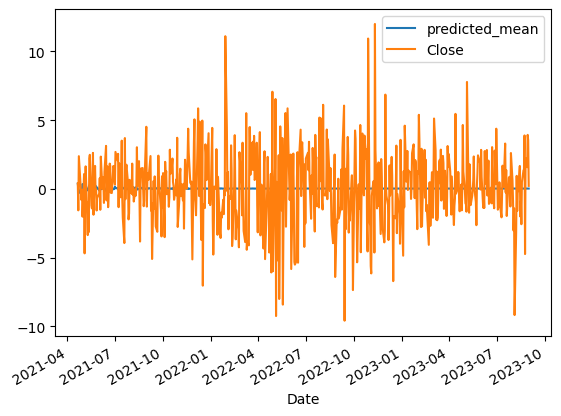

In [15]:
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)

2.7497652086229616
